## FBA Community

Author: Arianna Basile, MRC Toxicology Unit, University of Cambridge

__________________________________________________________________________________________________________________
In this tutorial:
<ul>
    <li>Create a small two species community (3.1) </li>
    <li>Learn some basics of pandas to extract metabolite exchanged (3.2)</li>
    <li>Change the medium and compare our results (3.3) </li>
</ul>

FOR ME! TO DO! In the model block export of acald glycolate and other selected compounds
Block import of h (protons)

Small intro about LAB and yeast Lactobacillus plantarum

Change the models to yeast.xml and bacteria.xml add an excercise about science paper

In [249]:
#import the needed packages
import cobra
import os
import micom
import pandas as pd
import matplotlib.pyplot as plt
import math

#enable autocompleting with tab
%config Completer.use_jedi = False

Now we are going to introduce community modelling with the case of study of the relationship between yeast and lactic acid bacteria. First let's do a step back. As you probably remember from what we learnt in the previous notebooks, yeast cannot grow using lactose as only carbon source. Can a lactic acid bacteria as the organims represented by the network (bacteria.xml) grow on this medium? 

In [250]:
model = cobra.io.read_sbml_model("bacteria.xml")
model.optimize()

,fluxes,reduced_costs
12DGR120tipp,0.0,0.0
12DGR140tipp,0.0,0.0
12DGR141tipp,0.0,0.0
12DGR160tipp,0.0,0.0
12DGR161tipp,0.0,0.0
...,...,...
GALt2,0.0,0.0
LCTStex,0.0,0.0
ALATA_L,0.0,0.0
SDPTA,0.0,0.0


In [251]:
with open("media.tsv", "r") as f:
    lines = f.readlines()

data = [line.rstrip().split("\t") for line in lines]
header, *rows = data

medium_dict = {}
for row in rows:
    medium, _, compound, _ = row
    medium_key = medium
    compound_value = "EX_" + compound + "_m"

    medium_dict.setdefault(medium_key, []).append(compound_value)

print(medium_dict.keys())


dict_keys(['CDM35_lcts', 'CDM35_gal', 'CDM35_glc', 'CDM35_low_AA_lcts', 'CDM35_low_AA_gal', 'CDM35_low_AA_glc'])


In [252]:
medium={}
for ele in medium_dict['CDM35_lcts']:
    medium[ele.replace("_m","_e")]=1000
    
ids_reac=[reac.id for reac in model.reactions]
v=list(medium.keys())
for ele in v:
    if ele not in ids_reac:
        medium.pop(ele)

model.medium=medium

model.medium
model.optimize()

[11:23:16] WARNING  Could not identify an external compartment by name   ]8;id=598693;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py\boundary_types.py]8;;\:]8;id=67342;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py#90\90]8;;\
                    and choosing one with the most boundary reactions.                       
                    That might be complete nonsense or change suddenly.                      
                    Consider renaming your compartments using                                
                    `Model.compartments` to fix this.                                        

           WARNING  Could not identify an external compartment by name   ]8;id=520319;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py\boundary_types.py]8;;\:]8;id=782620;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py#90\90]8;;\
                    and choosing one with the most boundary reactions.                       
                    That might be complete nonsense or change suddenly.                      
                    Consider renaming your compartments using                                
                    `Model.compartments` to fix this.                                        

,fluxes,reduced_costs
12DGR120tipp,0.0,0.0
12DGR140tipp,0.0,0.0
12DGR141tipp,0.0,0.0
12DGR160tipp,0.0,0.0
12DGR161tipp,0.0,0.0
...,...,...
GALt2,0.0,0.0
LCTStex,0.0,0.0
ALATA_L,0.0,0.0
SDPTA,0.0,0.0


The medium we chose is limiting also for the growth of the bacterium because even if it can metabolise lactose, the medium we chose is a very simple medium without vitamins and with a poor content of aminoacids. But what happens when we combine the yeast and the lactic acid bacterium together? 

The interactions between yeast and lactic acid bacteria (LAB) are multifaceted and crucial in various biological processes, notably in the realms of fermentation and food production. In symbiotic relationships, yeast and LAB often coexist in fermented foods such as sourdough bread, yogurt, and certain types of cheese. One of the key interactions involves metabolic cooperation, where yeast and LAB engage in cross-feeding by utilizing each other's metabolic byproducts. 

In [259]:
from cobra.medium import minimal_medium
max_growth = yeast.slim_optimize()
minimal_medium(yeast, max_growth)

[11:24:53] WARNING  Could not identify an external compartment by name   ]8;id=261877;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py\boundary_types.py]8;;\:]8;id=715399;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py#90\90]8;;\
                    and choosing one with the most boundary reactions.                       
                    That might be complete nonsense or change suddenly.                      
                    Consider renaming your compartments using                                
                    `Model.compartments` to fix this.                                        

           WARNING  Could not identify an external compartment by name   ]8;id=402712;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py\boundary_types.py]8;;\:]8;id=611229;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py#90\90]8;;\
                    and choosing one with the most boundary reactions.                       
                    That might be complete nonsense or change suddenly.                      
                    Consider renaming your compartments using                                
                    `Model.compartments` to fix this.                                        

/Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


EX_2pglyc_e       14.409412
EX_leu__L_e       13.150256
EX_cl_e            0.151925
EX_pi_e            8.535344
EX_adn_e           5.963092
EX_asn__L_e        7.035997
EX_ser__L_e        7.078291
EX_thr__L_e        7.404704
EX_arg__L_e        8.633680
EX_fe3_e           0.227903
EX_lys__L_e       10.016303
EX_asp__L_e        7.035997
EX_phe__L_e        5.407579
EX_k_e             5.697361
EX_bz_e            0.002919
EX_ca2_e           0.151925
EX_mg2_e           0.253209
EX_mn2_e           0.020169
EX_cobalt2_e       0.002919
EX_zn2_e           0.009953
EX_cu2_e           0.020695
EX_o2_e          646.895123
EX_glu__L_e       19.127679
EX_fe2_e           0.196000
EX_fol_e           0.019527
EX_gthrd_e         2.689881
EX_glycogen_e    672.618808
EX_gua_e           7.079896
EX_his__L_e        2.765246
EX_ile__L_e        8.480062
EX_met__L_e        4.492349
EX_uaagmda_e       2.918835
EX_nac_e           0.066491
EX_no_e          275.690372
EX_uri_e           9.655360
EX_pnto__R_e       0

In [42]:
max_growth

30.14020579649836

In [82]:
cobra.io.write_sbml_model(yeast,"yeast.xml")

### 3.1 Community modelling

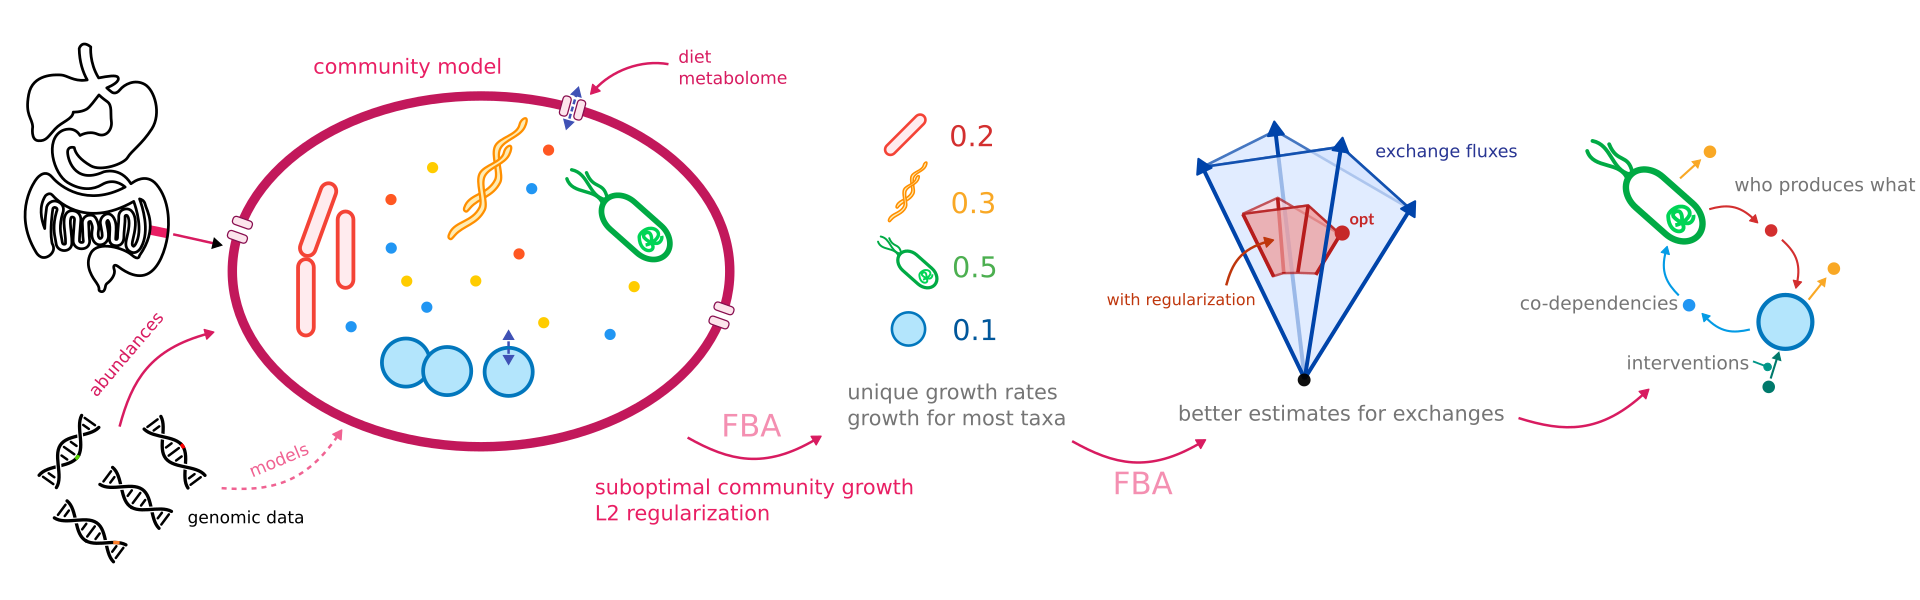

There are many frameworks for microbial modeling and all make their own specific assumptions in order to fit microbial communities into a mathematical representation. This is an overview about the assumptions MICOM makes and how it translates the community into mathematical terms.
In general MICOM makes several assumptions to infer growth rates and fluxes in a microbial community. The most important ones being:
<ul>
<li>Growth rates and relative abundances in the community are in steady state </li>
<li>Most taxa that are present in a biological sample should be able to grow (have a growth rate >0)</li>
<li>Relative DNA abundances can be used as a proxy for dry weight taxa abundances </li>
</ul>

Here is a link to the <a href="https://micom-dev.github.io/micom/index.html">micom documentation</a> 

In [253]:
#get a list of the models we will work on
files = [file for file in os.listdir(".") if file.endswith(".xml")]
print(files)

['yeast.xml', 'bacteria.xml']


In [254]:
# Create a DataFrame with the info you need to create a community in micom
data = {'id': [files[0].replace(".xml", ""), files[1].replace(".xml", "")],
        'file': [files[0], files[1]]}
df = pd.DataFrame(data)

# Create the community with the microbial species listed in the DataFrame
com = micom.Community(df,solver="glpk")


[11:23:23] WARNING  No QP solver found, will use GLPK. A lot of              ]8;id=877080;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=681401;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#145\145]8;;\
                    functionality in MICOM will require a QP solver :/                       

Output()

[11:23:27] WARNING  Could not identify an external compartment by name   ]8;id=128383;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py\boundary_types.py]8;;\:]8;id=568541;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/cobra/medium/boundary_types.py#90\90]8;;\
                    and choosing one with the most boundary reactions.                       
                    That might be complete nonsense or change suddenly.                      
                    Consider renaming your compartments using                                
                    `Model.compartments` to fix this.                                        

Inspect the medium. The default medium is a rich medium which maximizes the growth rates of both partners. Therefore, we expect a limited number of exchanges.

In [255]:
com.medium

{'EX_12ppd__S_m': 1000.0,
 'EX_glc__D_m': 1000.0,
 'EX_h2o_m': 1000.0,
 'EX_2dhglcn_m': 1000.0,
 'EX_h_m': 1000.0,
 'EX_2pglyc_m': 1000.0,
 'EX_34dhbz_m': 1000.0,
 'EX_leu__L_m': 1000.0,
 'EX_ala__L_m': 1000.0,
 'EX_cl_m': 1000.0,
 'EX_arab__L_m': 1000.0,
 'EX_4abut_m': 1000.0,
 'EX_acald_m': 1000.0,
 'EX_acgam_m': 1000.0,
 'EX_ac_m': 1000.0,
 'EX_chol_m': 1000.0,
 'EX_pi_m': 1000.0,
 'EX_actn__R_m': 1000.0,
 'EX_adn_m': 1000.0,
 'EX_nh4_m': 1000.0,
 'EX_ade_m': 1000.0,
 'EX_alaala_m': 1000.0,
 'EX_asn__L_m': 1000.0,
 'EX_gly_m': 1000.0,
 'EX_ser__L_m': 1000.0,
 'EX_thr__L_m': 1000.0,
 'EX_arg__L_m': 1000.0,
 'EX_alltn_m': 1000.0,
 'EX_malt_m': 1000.0,
 'EX_malttr_m': 1000.0,
 'EX_anhgm_m': 1000.0,
 'EX_arab__D_m': 1000.0,
 'EX_fe3_m': 1000.0,
 'EX_lys__L_m': 1000.0,
 'EX_orn_m': 1000.0,
 'EX_asp__L_m': 1000.0,
 'EX_phe__L_m': 1000.0,
 'EX_aso3_m': 1000.0,
 'EX_aso4_m': 1000.0,
 'EX_k_m': 1000.0,
 'EX_pro__L_m': 1000.0,
 'EX_cellb_m': 1000.0,
 'EX_bz_m': 1000.0,
 'EX_ca2_m': 1000.0,
 '

Now we want to change the feedstock using pre-defined media.

In [256]:
with open("media.tsv", "r") as f:
    lines = f.readlines()

data = [line.rstrip().split("\t") for line in lines]
header, *rows = data

medium_dict = {}
for row in rows:
    medium, _, compound, _ = row
    medium_key = medium
    compound_value = "EX_" + compound + "_m"

    medium_dict.setdefault(medium_key, []).append(compound_value)

print(medium_dict.keys())


dict_keys(['CDM35_lcts', 'CDM35_gal', 'CDM35_glc', 'CDM35_low_AA_lcts', 'CDM35_low_AA_gal', 'CDM35_low_AA_glc'])


We choose CDM35_gal as our medium for growth of the community 

In [257]:
medium={}
for ele in medium_dict['CDM35_lcts']:
    medium[ele]=1000

com.medium=medium

com.medium

[11:23:28] WARNING  I could not find the following exchanges in your model:  ]8;id=4627;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=216389;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#669\669]8;;\
                    EX_iodine_m                                                              

{'EX_h2o_m': 1000,
 'EX_h_m': 1000,
 'EX_leu__L_m': 1000,
 'EX_ala__L_m': 1000,
 'EX_cl_m': 1000,
 'EX_ac_m': 1000,
 'EX_pi_m': 1000,
 'EX_nh4_m': 1000,
 'EX_asn__L_m': 1000,
 'EX_gly_m': 1000,
 'EX_ser__L_m': 1000,
 'EX_thr__L_m': 1000,
 'EX_arg__L_m': 1000,
 'EX_fe3_m': 1000,
 'EX_lys__L_m': 1000,
 'EX_orn_m': 1000,
 'EX_asp__L_m': 1000,
 'EX_k_m': 1000,
 'EX_pro__L_m': 1000,
 'EX_ca2_m': 1000,
 'EX_mg2_m': 1000,
 'EX_mn2_m': 1000,
 'EX_cobalt2_m': 1000,
 'EX_zn2_m': 1000,
 'EX_co2_m': 1000,
 'EX_cu2_m': 1000,
 'EX_o2_m': 1000,
 'EX_glu__L_m': 1000,
 'EX_fe2_m': 1000,
 'EX_feenter_m': 1000,
 'EX_his__L_m': 1000,
 'EX_ile__L_m': 1000,
 'EX_met__L_m': 1000,
 'EX_so4_m': 1000,
 'EX_tyr__L_m': 1000,
 'EX_val__L_m': 1000,
 'EX_thm_m': 1000,
 'EX_lcts_m': 1000}

Now we optimize for the community growth 

In [258]:
#let's optimize using the function optimize which doesn't require commercial solvers

sol=com.optimize(fluxes=True)
sol


,abundance,growth_rate,reactions,metabolites
compartments,,,,
bacteria,0.5,1.093580e+01,1642,1157
medium,NaN,NaN,208,208
yeast,0.5,1.051217e-16,1228,937


## Questions
1. We want to filter the matrix sol.fluxes looking for the reactions starting with "EX" which we know representing the exchanges, how would you do? 

In [157]:
#code here



### Tip
The object sol.fluxes is a pandas DataFrame

----------

### 3.2 Using pandas to analyse our results

In [222]:
matrix=sol.fluxes
matrix1=matrix.filter(regex='^EX')
matrix1

reaction,EX_12ppd__S_e,EX_12ppd__S_m,EX_14glucan_e,EX_14glucan_m,EX_23camp_e,EX_23camp_m,EX_23ccmp_e,EX_23ccmp_m,EX_23cgmp_e,EX_23cgmp_m,...,EX_val__L_e,EX_val__L_m,EX_xan_e,EX_xan_m,EX_xyl__D_e,EX_xyl__D_m,EX_xylan4_e,EX_xylan4_m,EX_zn2_e,EX_zn2_m
compartment,,,,,,,,,,,,,,,,,,,,,
bacteria,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,-4.48147,NaN,0.0,NaN,0.0,NaN,0.0,NaN,-3.611339e-03,NaN
medium,NaN,-0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,-2.243785,NaN,0.0,NaN,0.0,NaN,0.0,NaN,-0.001806
yeast,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.00610,NaN,NaN,NaN,0.0,NaN,NaN,NaN,-9.572786e-21,NaN


After finding the exchanges we want to highlight the compounds produced by the bacterium and absorbed by the yeast or the other way around to underline the main exchanges

In [223]:
# Filter columns for "iMM904" with values lower than 0
#condition_iMM904 = (matrix1.loc['iMM904'] < 0)
condition_bacteria = (matrix1.loc['bacteria'] < -0.01)

# Filter columns for "iNF517" with values higher than 0
#condition_iNF517 = (matrix1.loc['iNF517'] > 0)
condition_yeast = (matrix1.loc['yeast'] > 0.01)

# Combine the conditions using logical AND (&) 
selected_dataframe_1 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]


selected_dataframe_1



reaction,EX_glu__L_e
compartment,
bacteria,-100.000000
medium,NaN
yeast,45.412287


In [224]:
# Filter columns for bacteria and yeast
condition_bacteria = (matrix1.loc['bacteria'] > 0.01)

condition_yeast = (matrix1.loc['yeast'] < -0.01)

# Combine the conditions using logical AND (&)
selected_dataframe_2 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]

selected_dataframe_2

reaction,EX_gal_e
compartment,
bacteria,0.084035
medium,NaN
yeast,-0.084035


Unlike in the single species simulations, here the yeast can grow on lactose but only because it is helped by the bacterium which metabolises the lactose to galactose and glucose. The galactose is then taken by the yeast.

In [225]:
# Concatenate along columns (horizontally)
concatenated_df = pd.concat([selected_dataframe_1, selected_dataframe_2], axis=1)

print("Concatenated DataFrame along columns:")
concatenated_df_nomedia = concatenated_df.drop('medium')
concatenated_df_nomedia

Concatenated DataFrame along columns:


reaction,EX_glu__L_e,EX_gal_e
compartment,,
bacteria,-100.000000,0.084035
yeast,45.412287,-0.084035


Let's play with matplotlib to represent grafically the results

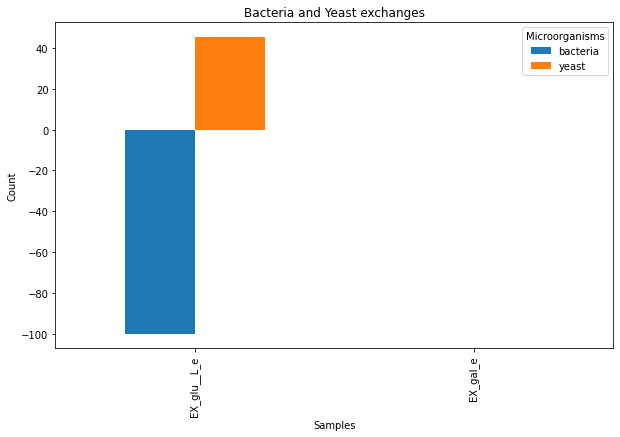

In [203]:
# Plotting a bar plot
ax = concatenated_df_nomedia.T.plot(kind='bar', figsize=(10, 6))
plt.title('Bacteria and Yeast exchanges')
plt.xlabel('Samples')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend(title='Microorganisms', loc='upper right')
plt.show()

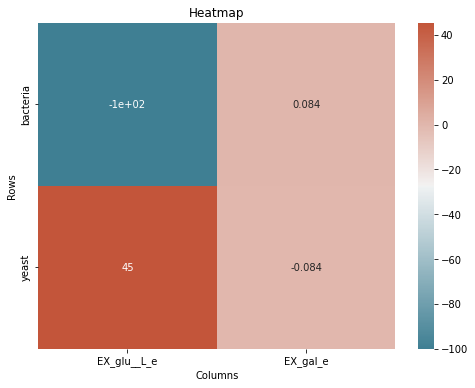

In [204]:
import seaborn as sns
# Create heatmap
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(concatenated_df_nomedia, annot=True, cmap=palette)  # Annotate cells with values and choose colormap
plt.title('Heatmap')  # Add title
plt.xlabel('Columns')  # Add label for x-axis
plt.ylabel('Rows')  # Add label for y-axis
plt.show()

## Questions
1. Check if the lactose is absorbed by the bacterium as we expect. Can you do it with one line code? 

## Solution

In [260]:
matrix1["EX_glc__D_e"]

compartment
bacteria    0.0
medium      NaN
yeast       0.0
Name: EX_glc__D_e, dtype: float64

### 3.3 Change the medium and compare our results

In [235]:
medium={}
for ele in medium_dict['CDM35_gal']:
    medium[ele]=1000
com.medium=medium

com.medium

[11:19:42] WARNING  I could not find the following exchanges in your model:  ]8;id=598509;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=439447;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#669\669]8;;\
                    EX_iodine_m                                                              

{'EX_h2o_m': 1000,
 'EX_h_m': 1000,
 'EX_leu__L_m': 1000,
 'EX_ala__L_m': 1000,
 'EX_cl_m': 1000,
 'EX_pi_m': 1000,
 'EX_nh4_m': 1000,
 'EX_asn__L_m': 1000,
 'EX_gly_m': 1000,
 'EX_arg__L_m': 1000,
 'EX_fe3_m': 1000,
 'EX_orn_m': 1000,
 'EX_asp__L_m': 1000,
 'EX_k_m': 1000,
 'EX_ca2_m': 1000,
 'EX_mg2_m': 1000,
 'EX_mn2_m': 1000,
 'EX_cobalt2_m': 1000,
 'EX_zn2_m': 1000,
 'EX_co2_m': 1000,
 'EX_cu2_m': 1000,
 'EX_o2_m': 1000,
 'EX_glu__L_m': 1000,
 'EX_fe2_m': 1000,
 'EX_feenter_m': 1000,
 'EX_gal_m': 1000,
 'EX_his__L_m': 1000,
 'EX_ile__L_m': 1000,
 'EX_met__L_m': 1000,
 'EX_so4_m': 1000,
 'EX_tyr__L_m': 1000,
 'EX_val__L_m': 1000,
 'EX_thm_m': 1000}

In [236]:
sol=com.optimize(fluxes=True)
sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
bacteria,0.5,7.177319,1642,1157
medium,NaN,NaN,208,208
yeast,0.5,2.731211,1228,937


In [237]:
matrix=sol.fluxes
matrix1=matrix.filter(regex='^EX')
matrix1

reaction,EX_12ppd__S_e,EX_12ppd__S_m,EX_14glucan_e,EX_14glucan_m,EX_23camp_e,EX_23camp_m,EX_23ccmp_e,EX_23ccmp_m,EX_23cgmp_e,EX_23cgmp_m,...,EX_val__L_e,EX_val__L_m,EX_xan_e,EX_xan_m,EX_xyl__D_e,EX_xyl__D_m,EX_xylan4_e,EX_xylan4_m,EX_zn2_e,EX_zn2_m
compartment,,,,,,,,,,,,,,,,,,,,,
bacteria,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,-2.941252,NaN,0.0,NaN,0.0,NaN,0.0,NaN,-0.002370,NaN
medium,NaN,-0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,-2.033012,NaN,0.0,NaN,0.0,NaN,0.0,NaN,-0.001636
yeast,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.124772,NaN,NaN,NaN,0.0,NaN,NaN,NaN,-0.000902,NaN


In [238]:
condition_bacteria = (matrix1.loc['bacteria'] < -0.01)

condition_yeast = (matrix1.loc['yeast'] > 0.01)

# Combine the conditions using logical AND (&) 
selected_dataframe_1 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]
selected_dataframe_1

reaction
compartment
bacteria
medium
yeast


In [231]:

condition_bacteria = (matrix1.loc['bacteria'] > 0.01)

condition_yeast = (matrix1.loc['yeast'] < -0.01)

# Combine the conditions using logical AND (&)
selected_dataframe_2 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]

selected_dataframe_2


reaction,EX_ac_e,EX_phe__L_e,EX_ser__L_e,EX_trp__L_e
compartment,,,,
bacteria,391.429065,0.490018,3.267356,0.150347
medium,NaN,NaN,NaN,NaN
yeast,-0.459783,-0.490018,-3.267356,-0.150347


In [239]:
# Concatenate along columns (horizontally)
concatenated_df = pd.concat([selected_dataframe_1, selected_dataframe_2], axis=1)

print("Concatenated DataFrame along columns:")
concatenated_df_nomedia = concatenated_df.drop('medium')
concatenated_df_nomedia

Concatenated DataFrame along columns:


reaction,EX_ac_e,EX_phe__L_e,EX_ser__L_e,EX_trp__L_e
compartment,,,,
bacteria,391.429065,0.490018,3.267356,0.150347
yeast,-0.459783,-0.490018,-3.267356,-0.150347


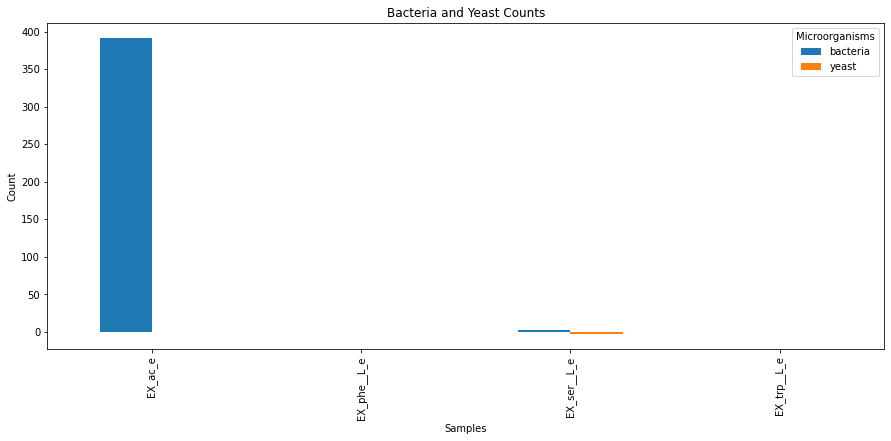

In [240]:
# Plotting a bar plot
ax = concatenated_df_nomedia.T.plot(kind='bar', figsize=(15, 6))
plt.title('Bacteria and Yeast Counts')
plt.xlabel('Samples')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend(title='Microorganisms', loc='upper right')
plt.show()

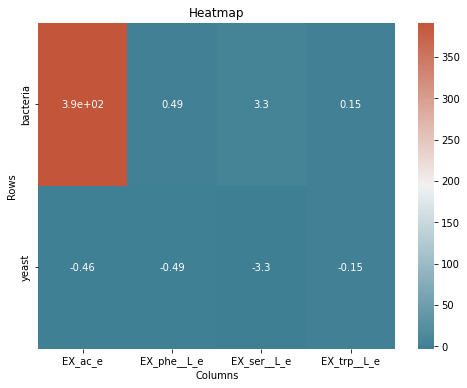

In [241]:
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(concatenated_df_nomedia, annot=True, cmap=palette)  # Annotate cells with values and choose colormap
plt.title('Heatmap')  # Add title
plt.xlabel('Columns')  # Add label for x-axis
plt.ylabel('Rows')  # Add label for y-axis
plt.show()

## Questions
1. Edit the medium considering an environment poor in aminoacids. What do you expect to see in your simulations? Why?

In [ ]:
#type your code here

## Solution

[11:22:39] WARNING  I could not find the following exchanges in your model:  ]8;id=139809;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=514235;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#669\669]8;;\
                    EX_iodine_m                                                              

Concatenated DataFrame along columns:


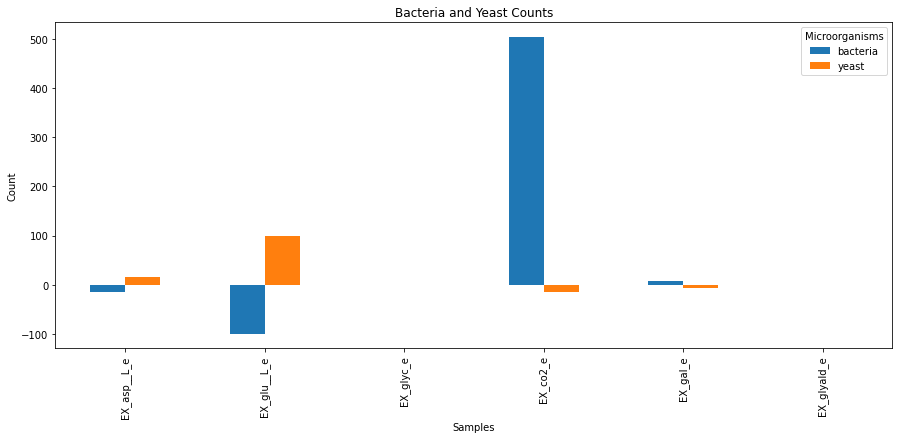

In [246]:
medium={}
for ele in medium_dict['CDM35_low_AA_lcts']:
    medium[ele]=1000
com.medium=medium

com.medium
sol=com.optimize(fluxes=True)
sol
matrix=sol.fluxes
matrix1=matrix.filter(regex='^EX')
matrix1

condition_bacteria = (matrix1.loc['bacteria'] < -0.01)
condition_yeast = (matrix1.loc['yeast'] > 0.01)

# Combine the conditions using logical AND (&) 
selected_dataframe_1 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]
selected_dataframe_1

condition_bacteria = (matrix1.loc['bacteria'] > 0.01)
condition_yeast = (matrix1.loc['yeast'] < -0.01)

# Combine the conditions using logical AND (&)
selected_dataframe_2 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]
selected_dataframe_2

# Concatenate along columns (horizontally)
concatenated_df = pd.concat([selected_dataframe_1, selected_dataframe_2], axis=1)

print("Concatenated DataFrame along columns:")
concatenated_df_nomedia = concatenated_df.drop('medium')
concatenated_df_nomedia

# Plotting a bar plot
ax = concatenated_df_nomedia.T.plot(kind='bar', figsize=(15, 6))
plt.title('Bacteria and Yeast Counts')
plt.xlabel('Samples')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend(title='Microorganisms', loc='upper right')
plt.show()

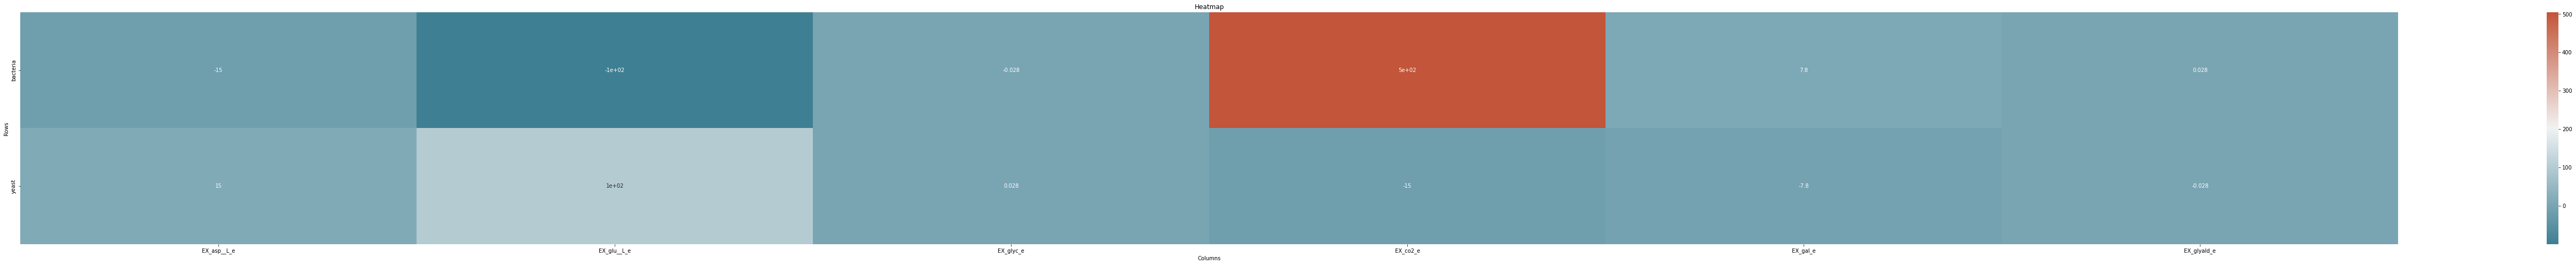

In [247]:
plt.figure(figsize=(100, 8))  # Adjust the size of the figure as needed
palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(concatenated_df_nomedia, annot=True, cmap=palette)  # Annotate cells with values and choose colormap
plt.title('Heatmap')  # Add title
plt.xlabel('Columns')  # Add label for x-axis
plt.ylabel('Rows')  # Add label for y-axis
plt.show()

In [248]:
sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
bacteria,0.5,8.759353e+00,1642,1157
medium,NaN,NaN,208,208
yeast,0.5,4.883192e-16,1228,937
